# Mögliche verbesserungen
- Epsilon decay: Minimalwert bei 0.05 setzen
- Reward:
  1. Bei verlust für das setzen auf markt belohnen (reward + 5)
  2. Verlust stärker bestrafen (reward * 1.5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

from marketenvironment import MarketEnvironment
from plots import plot_q_tables, plot_rewards, plot_reward_for

# RL-Environment

In [5]:
def run_episode(sim_env: MarketEnvironment, max_steps: int):
    states = sim_env.reset()
    done = False
    step_count = 0

    rewards_info = {}

    while not done and step_count < max_steps:
        # print(f"--- Step {step_count} ---")
        actions = {}
        for agent in sim_env.agents.values():
            actions[agent.name] = agent.choose_action(states[agent.name])

        next_state, rewards, done, info = sim_env.step(actions)

        rewards_info[step_count] = rewards
        rewards_info[step_count]['mean_reward'] = sum(rewards.values()) / len(rewards.keys())
        rewards_info[step_count]['social_welfare'] = sum(rewards.values())

        for agent in sim_env.agents.values():
            agent.learn(
                states[agent.name], actions[agent.name],
                rewards[agent.name], next_state[agent.name]
            )

        states = next_state
        step_count += 1

    return sim_env, rewards_info

In [6]:
costs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
sim_env = MarketEnvironment(num_agents=9, costs=costs, sigma=0)
# steps = 24 * 365 * 10
steps = 8000
print(f"Running simulation for {steps} steps...")
sim_env, rewards_info = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


Plotting Q-Tables
Agent RZ1 with cost 1 and sigma 0


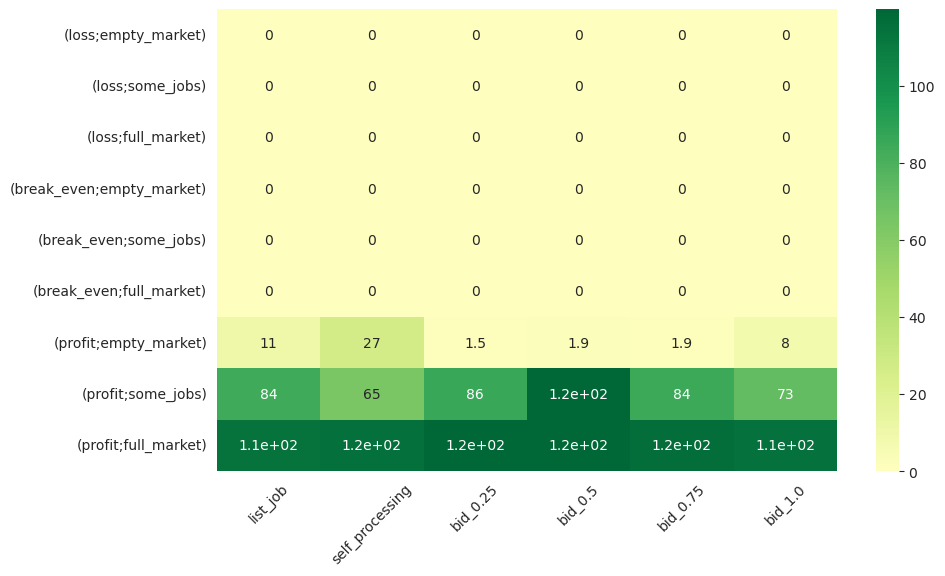

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ 11.20974365,  26.73263107,   1.46522258,   1.8817437 ,
          1.85324653,   7.97778404],
       [ 83.88997687,  64.55355943,  86.23126548, 119.53604917,
         84.37647476,  72.88480878],
       [114.32012719, 116.20696214, 119.32748052, 119.99999893,
        116.41557649, 114.88630057]])
Agent RZ2 with cost 2 and sigma 0


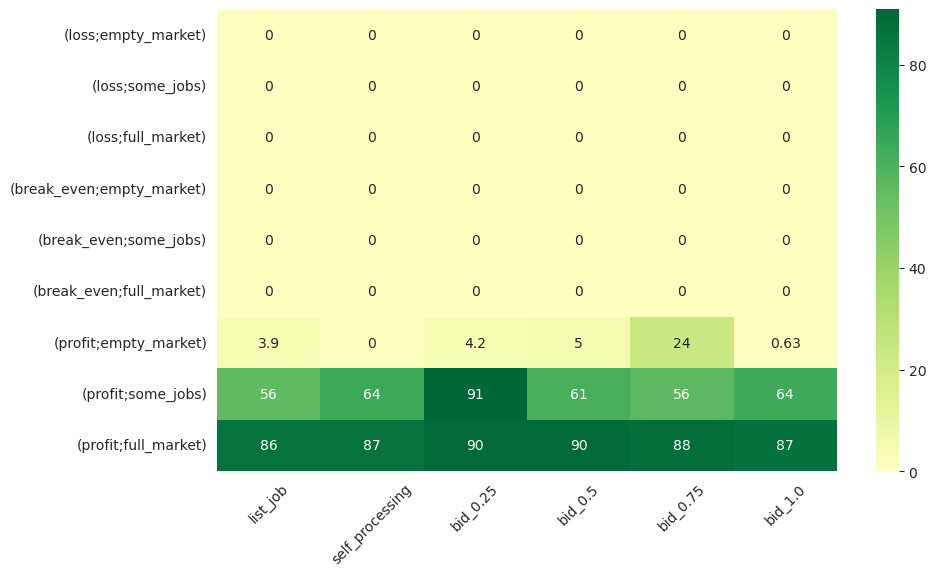

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 3.94980979,  0.        ,  4.23284205,  4.98075507, 23.90267188,
         0.62874395],
       [55.51973214, 63.96491069, 90.91993383, 61.29948009, 56.31452247,
        63.60408625],
       [86.34973159, 86.62335314, 89.8417834 , 90.00000194, 88.19408879,
        87.08683639]])
Agent RZ3 with cost 3 and sigma 0


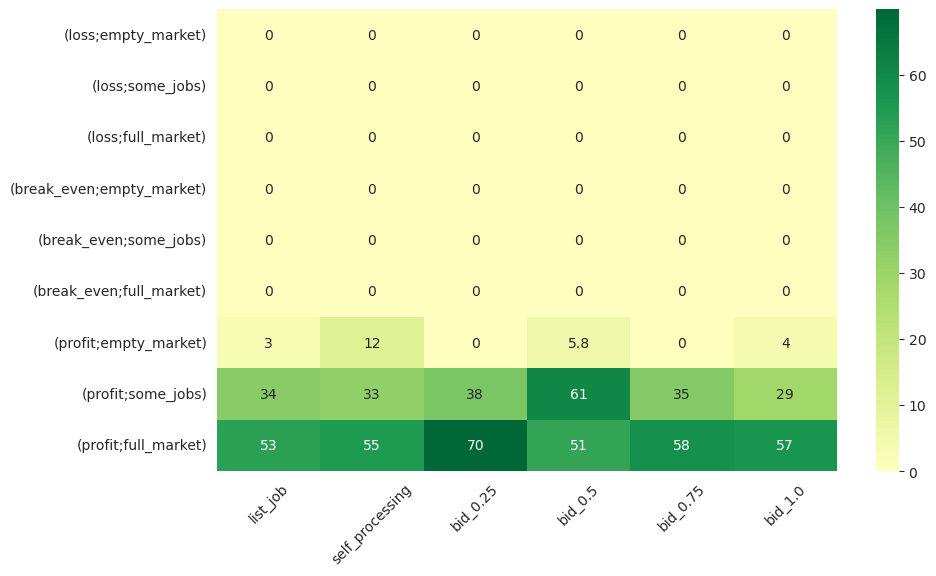

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 3.02145357, 11.79607765,  0.        ,  5.81166371,  0.        ,
         3.97110126],
       [34.31831489, 32.80805032, 37.58116297, 61.03033873, 35.33940309,
        28.98397973],
       [52.87318203, 54.77218951, 69.99997981, 51.07012572, 57.55880175,
        56.68511781]])
Agent RZ4 with cost 4 and sigma 0


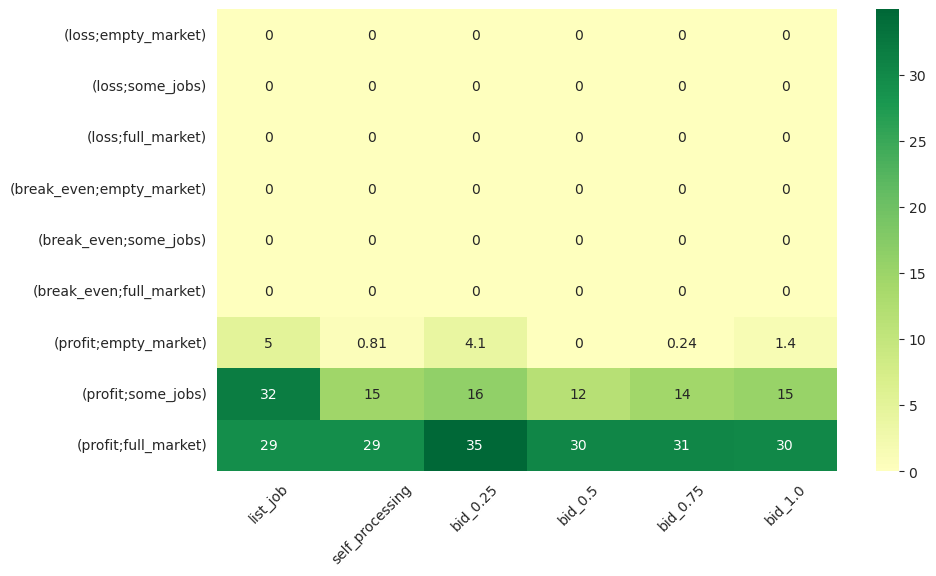

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 4.9817007 ,  0.80908942,  4.05877227,  0.        ,  0.2354264 ,
         1.40707559],
       [31.87675423, 14.61376192, 16.16500465, 11.66266796, 14.2412131 ,
        15.37917258],
       [29.43737237, 29.48361617, 34.99999137, 30.42756006, 30.52996411,
        30.33554436]])
Agent RZ5 with cost 5 and sigma 0


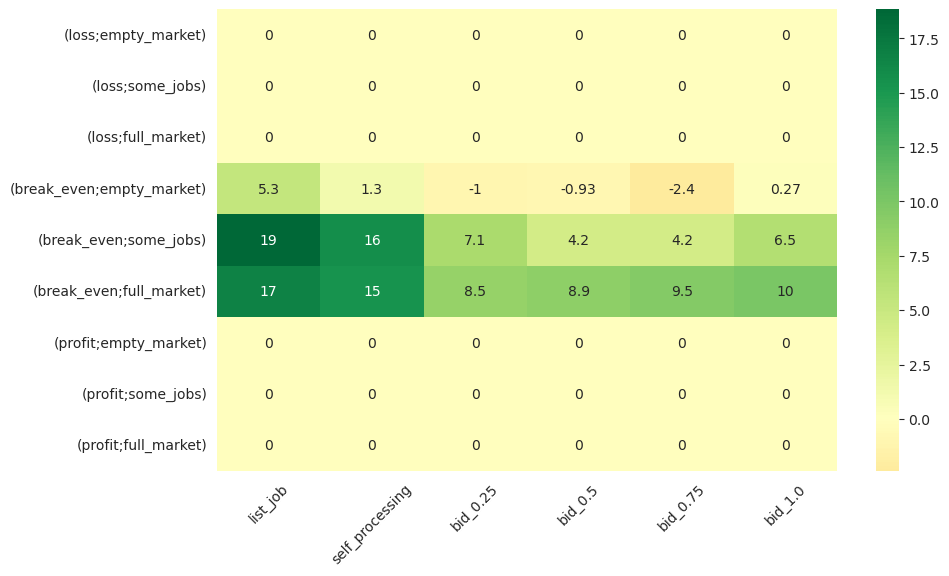

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 5.33841809,  1.32669347, -1.00171022, -0.92993962, -2.4011642 ,
         0.26632107],
       [18.83315036, 15.8007499 ,  7.06590737,  4.24626212,  4.15392115,
         6.53931685],
       [16.7410533 , 15.28094463,  8.51915175,  8.94101996,  9.45962696,
         9.99375522],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])
Agent RZ6 with cost 6 and sigma 0


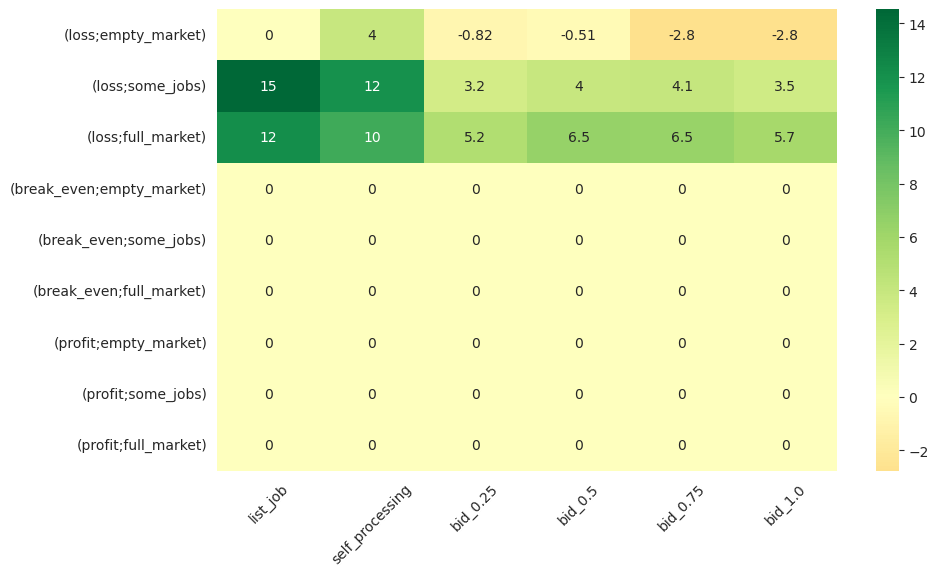

array([[ 0.        ,  3.96011376, -0.81539553, -0.50932469, -2.76472067,
        -2.78023471],
       [14.53569729, 11.96271105,  3.19379976,  3.9723863 ,  4.09476984,
         3.47753757],
       [12.20883811, 10.17848631,  5.16387596,  6.51860741,  6.46605454,
         5.72284328],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])
Agent RZ7 with cost 7 and sigma 0


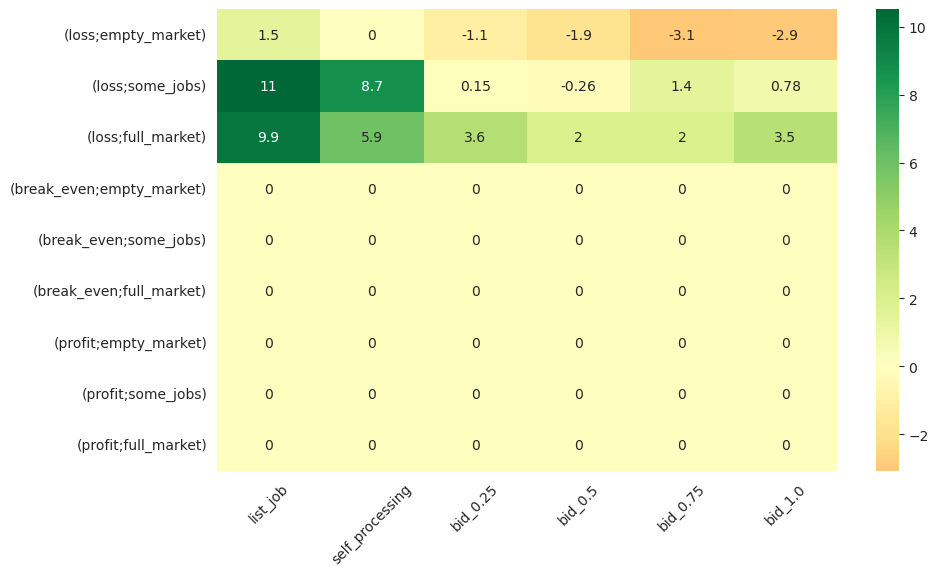

array([[ 1.47676021,  0.        , -1.09845297, -1.86289606, -3.08740899,
        -2.94792955],
       [10.5174831 ,  8.73201562,  0.15245185, -0.25704541,  1.43826241,
         0.77602541],
       [ 9.9008714 ,  5.94084001,  3.55566386,  2.04995868,  2.0195285 ,
         3.49726023],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])
Agent RZ8 with cost 8 and sigma 0


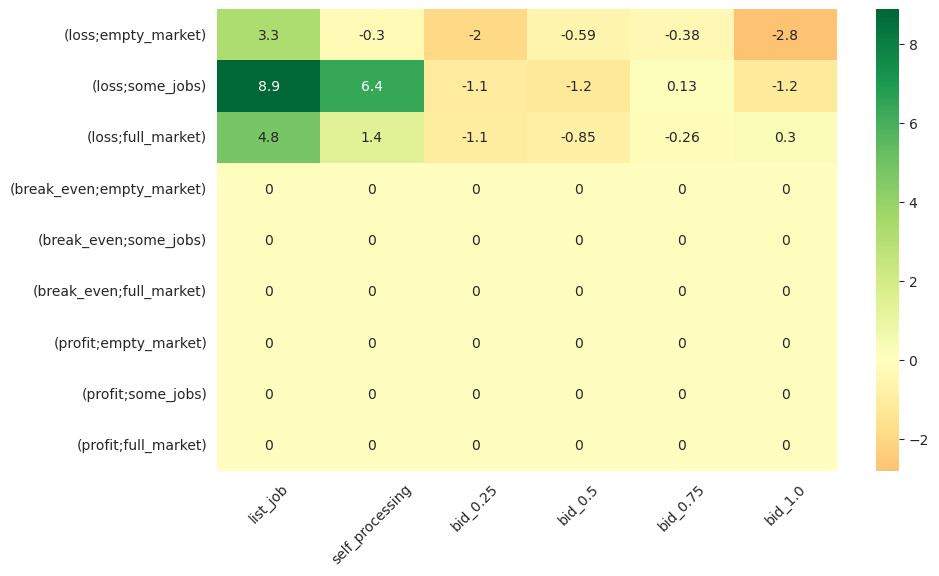

array([[ 3.30395888, -0.3       , -1.95415   , -0.59117008, -0.3761216 ,
        -2.81976501],
       [ 8.87990686,  6.41067212, -1.08538671, -1.24475822,  0.13037438,
        -1.18966532],
       [ 4.77596804,  1.38527682, -1.06581779, -0.85335382, -0.25833703,
         0.29930513],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])
Agent RZ9 with cost 9 and sigma 0


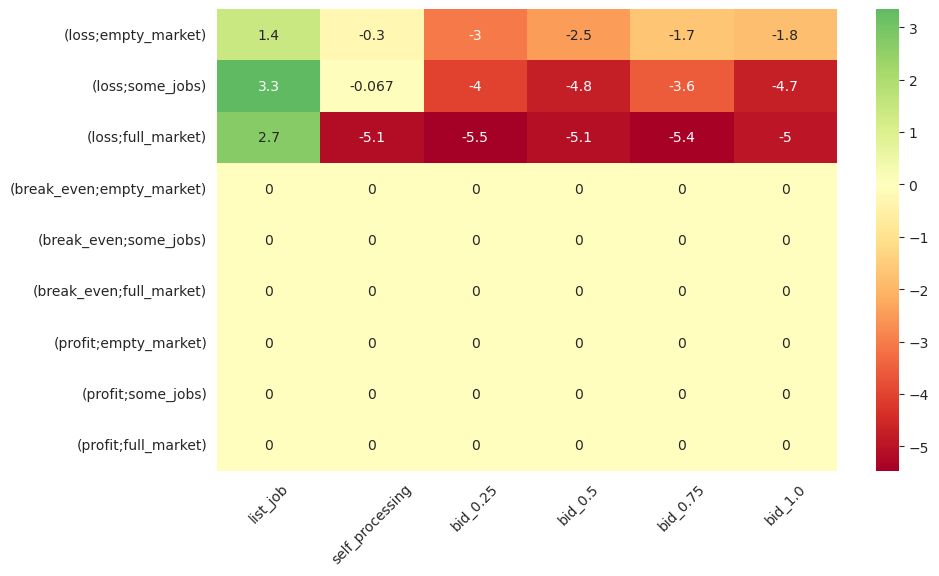

array([[ 1.44828733, -0.29546551, -3.03596182, -2.45418717, -1.71426452,
        -1.79330635],
       [ 3.34748819, -0.06667586, -4.04784166, -4.78530907, -3.55645369,
        -4.69832123],
       [ 2.71878666, -5.14369612, -5.47573068, -5.12246123, -5.38577566,
        -4.97073709],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])
Plotting Rewards


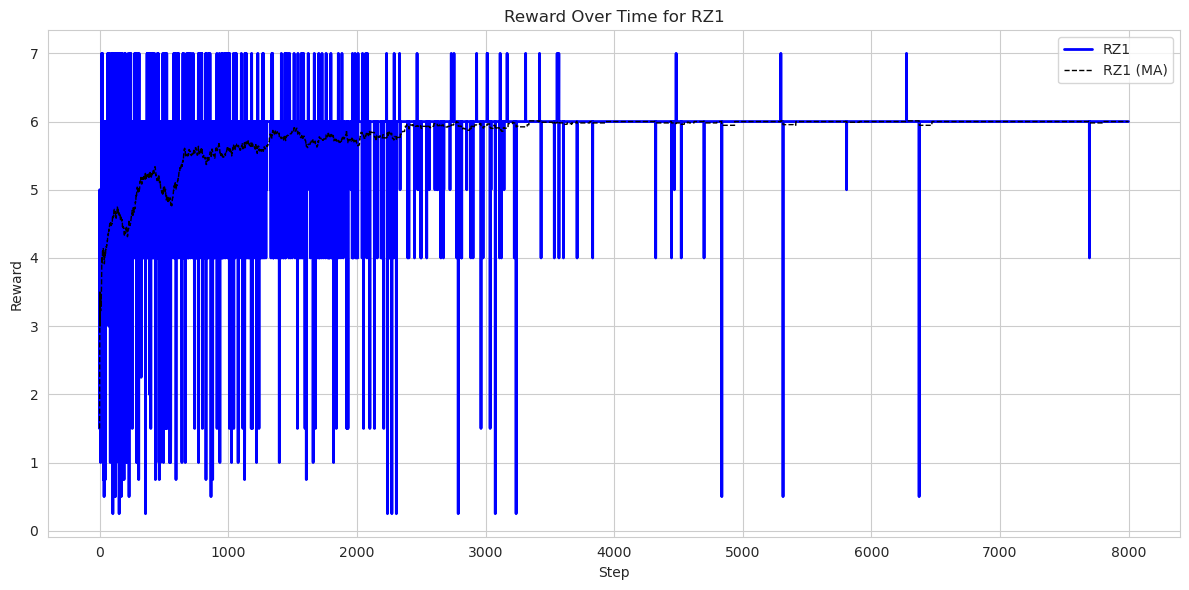

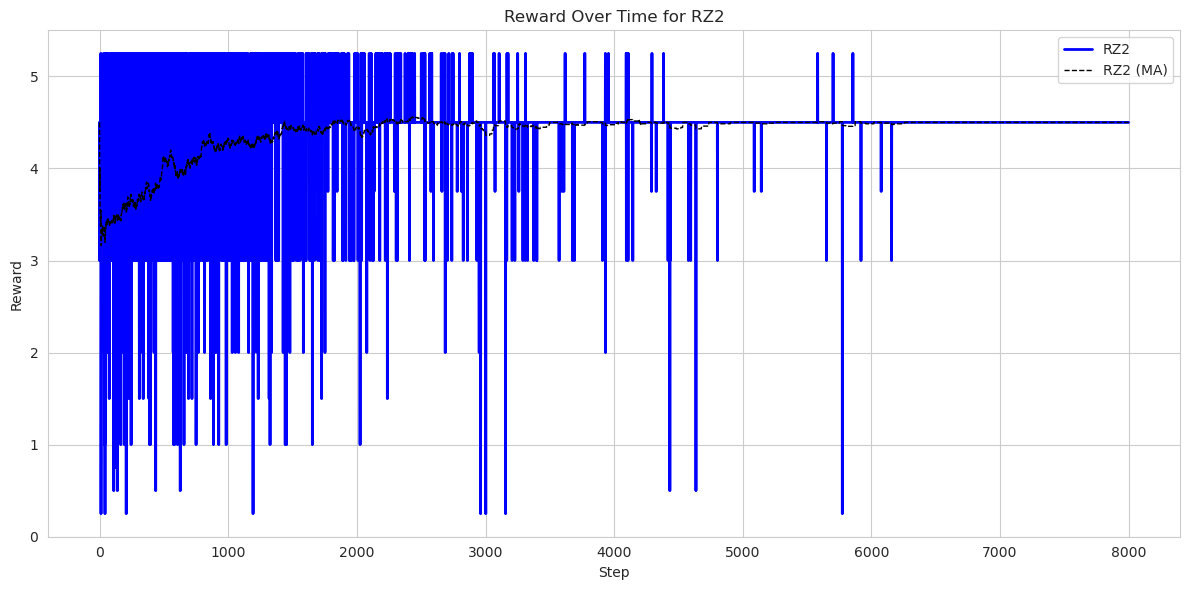

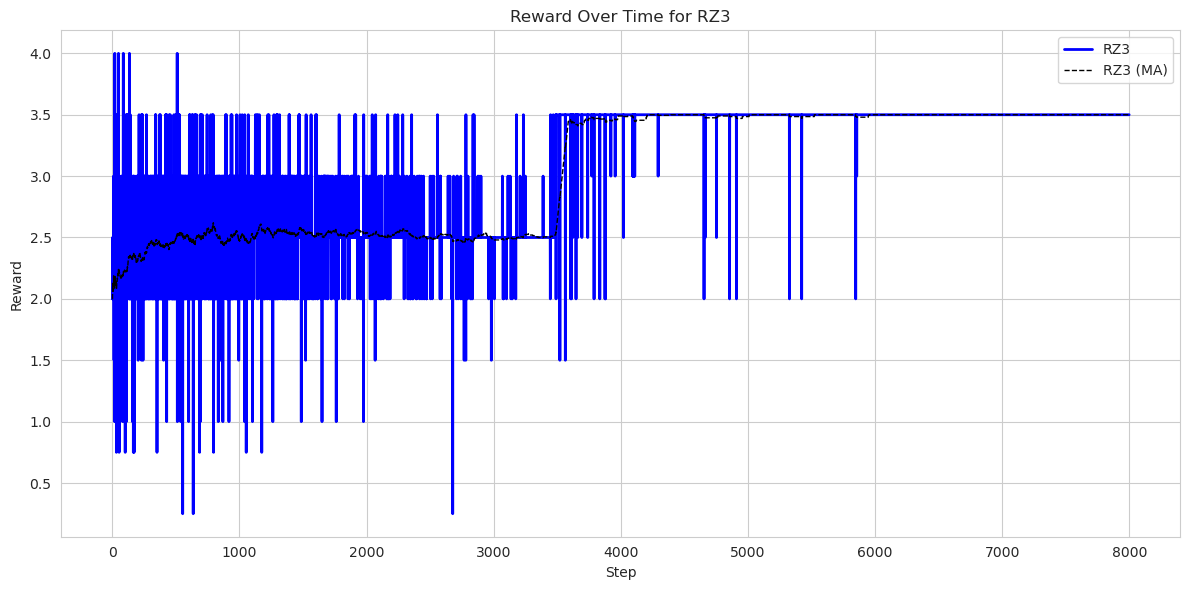

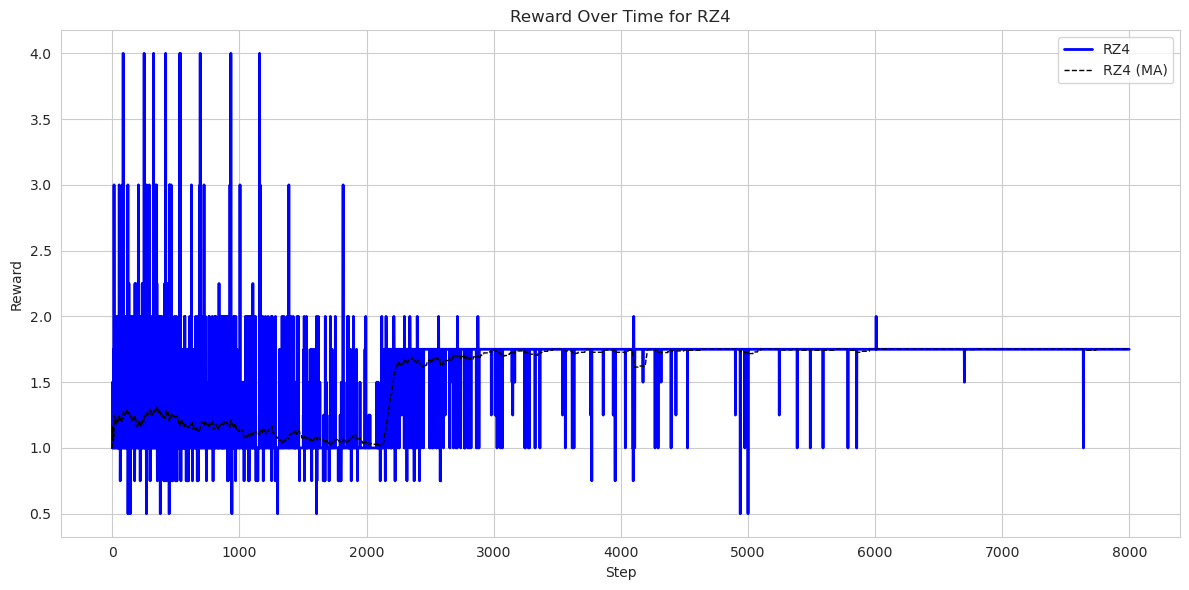

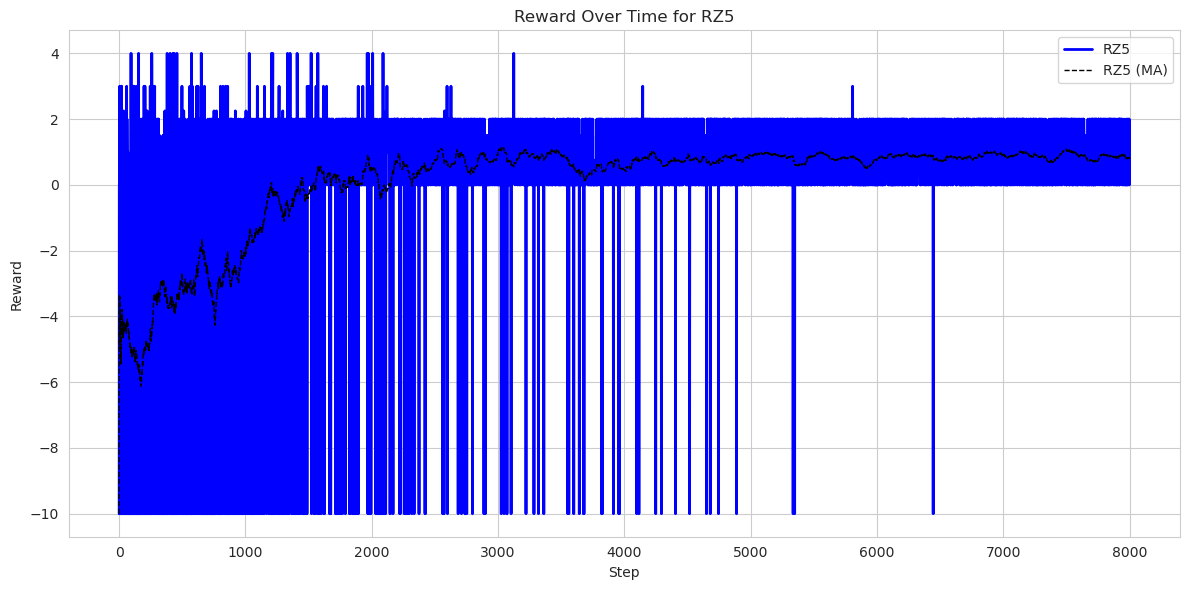

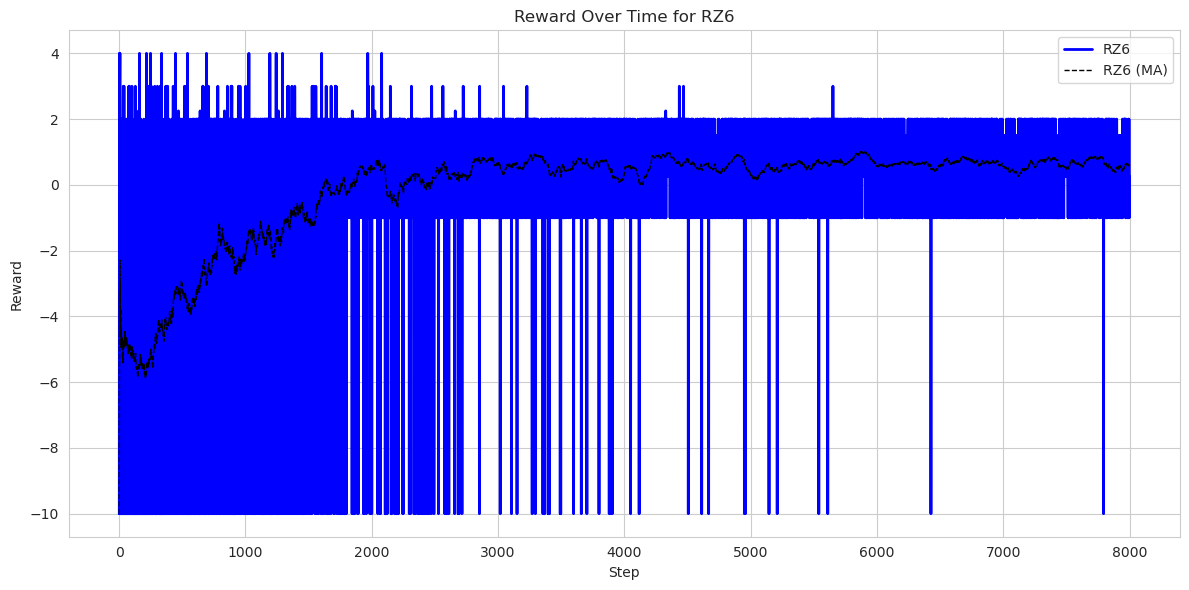

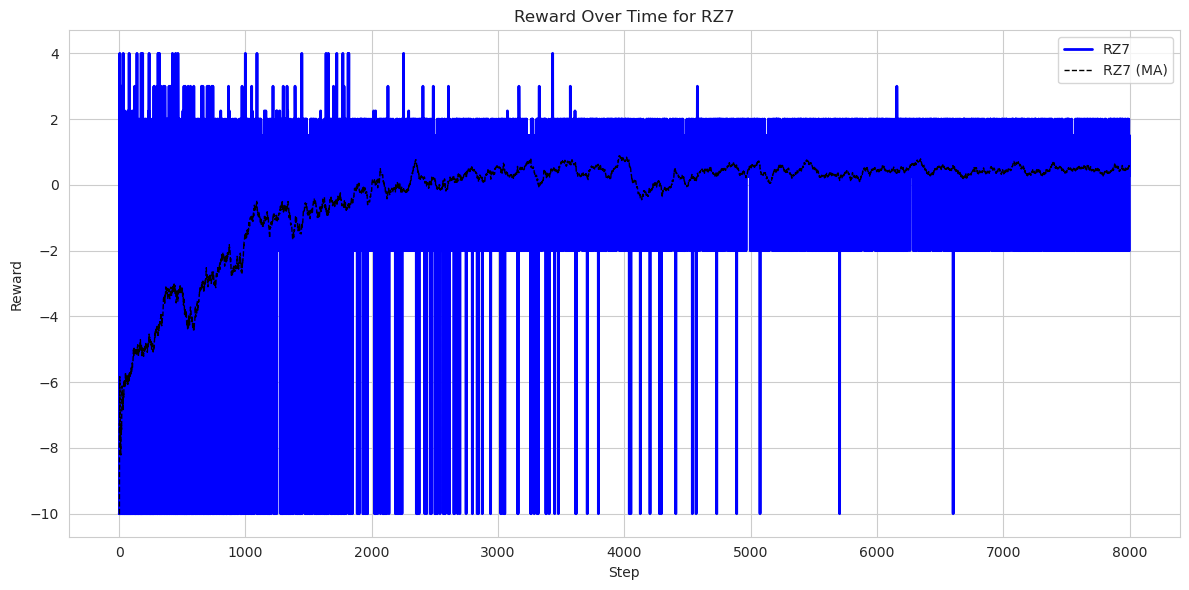

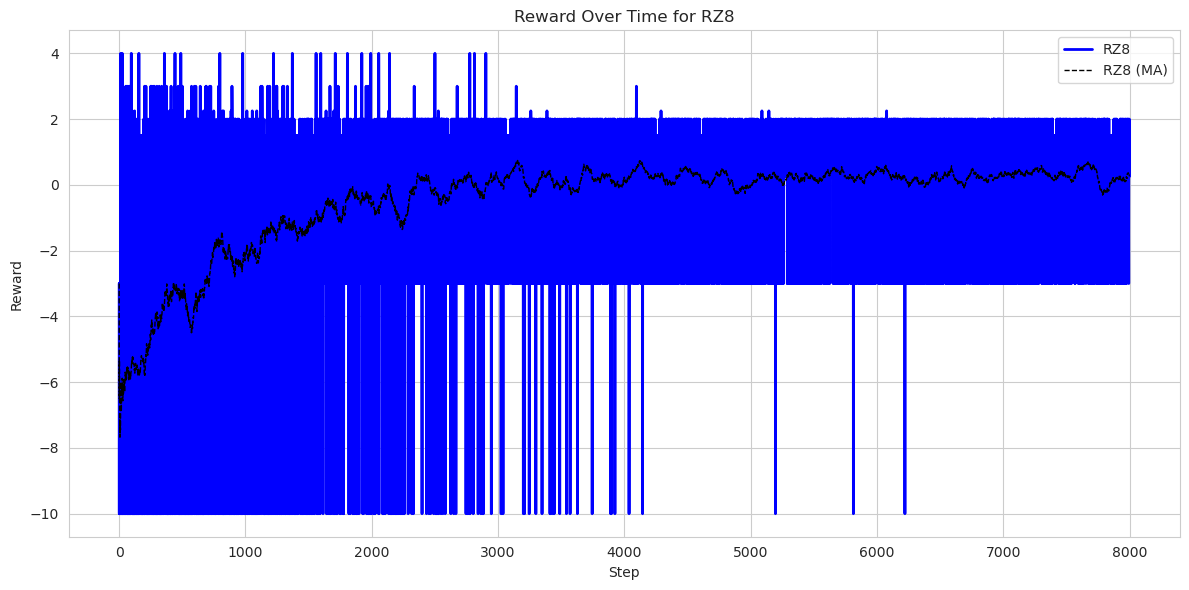

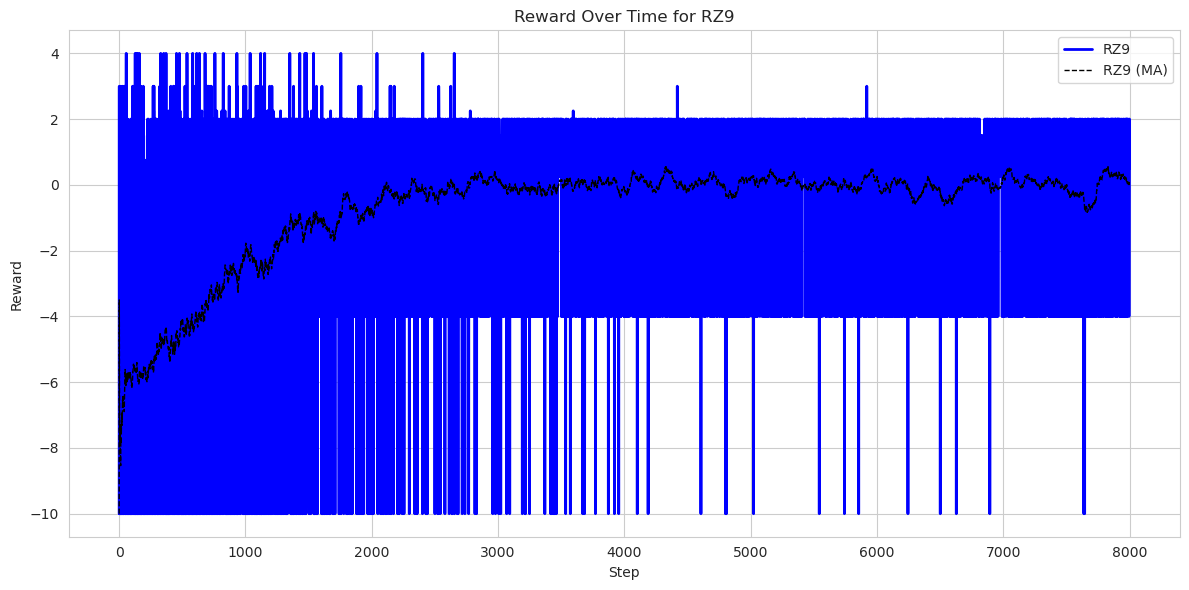

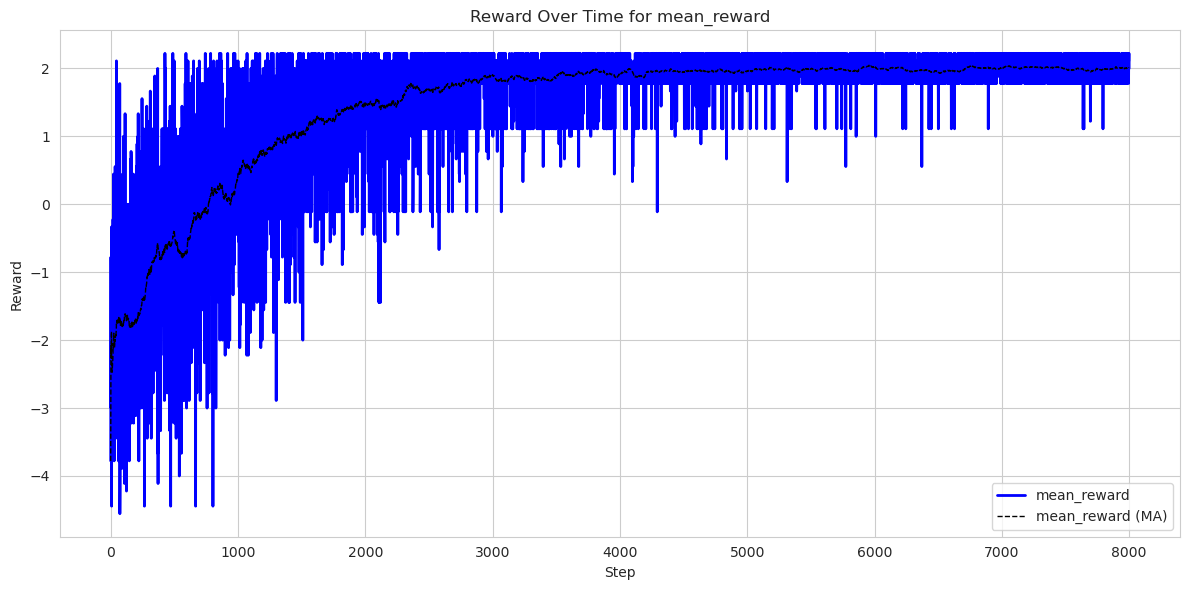

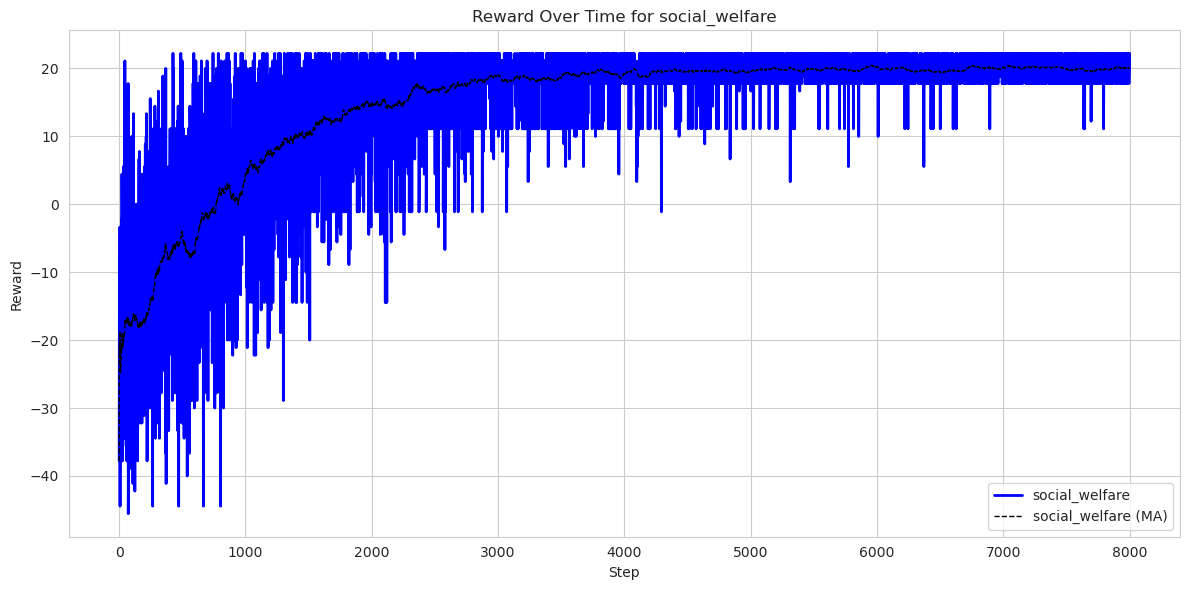

In [11]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Agent {agent.name} with cost {agent.mean_cost} and sigma {agent.sigma}")
    plot_q_tables(agent)
    pprint(agent.q_table)

print("Plotting Rewards")
for agent in sim_env.agents.values():
    plot_reward_for(agent.name, rewards_info)

plot_reward_for("mean_reward", rewards_info)
plot_reward_for("social_welfare", rewards_info)

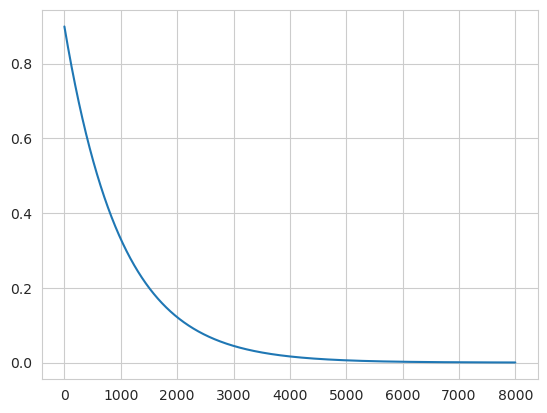

In [8]:
epsilon = 0.9
eps = {}

for step in range(steps):
    epsilon *= 0.999
    eps[step] = epsilon

value = [value for value in eps.values()]

plt.plot(eps.keys(), value)